## JSON

In [2]:
import json

with open('subvenciones.json') as fich:
    datos = json.load(fich)
    print(json.dumps(datos[0:2], indent=2))

[
  {
    "Asociaci\u00f3n": "AMPA ANTONIO MACHADO",
    "Actividad Subvencionada": "TALLER FIESTA DE CARNAVAL",
    "Importe en euros": "94.56"
  },
  {
    "Asociaci\u00f3n": "AMPA ANTONIO MACHADO",
    "Actividad Subvencionada": "TALLER DIA DEL PADRE",
    "Importe en euros": "39.04 "
  }
]


In [6]:
with open('subvenciones.json', encoding='utf-8') as fich_lect, open('subvenciones_agrupadas.json', 'w', encoding='utf-8') as fich_escr:
    data = json.load(fich_lect)
    asoc_str = "Asociación"
    act_str = "Actividad Subvencionada"
    imp_str = "Importe en euros"
    lista = []
    lista_act = []
    asoc_actual = ""
    dicc = {}
    for elem in data:
        asoc = elem[asoc_str]
        act = elem[act_str]
        imp = elem[imp_str]
        if asoc_actual != asoc:
            dicc["Actividades"] = lista_act
            dicc = {"Asociación": asoc}
            lista.append(dicc)
            lista_act = []
        lista_act.append({act_str : act, imp_str : imp})
        asoc_actual = asoc
    print(lista)
    json.dump(lista, fich_escr, ensure_ascii=False, indent=4) # , sort_keys=False

None


In [22]:
with open('subvenciones.json', encoding='utf-8') as fich_lect, open('subvenciones_agrupadas.json', 'w', encoding='utf-8') as fich_escr:
# Open the input JSON file for reading and columns name
    data = json.load(fich_lect)
    asoc_str = "Asociación"
    act_str = "Actividad Subvencionada"
    imp_str = "Importe en euros"
    lista = []
    lista_act = []
    asoc_actual = ""
    dicc = {}
    for elem in data:
        asoc = elem[asoc_str]  #get asociation
        act = elem[act_str]    #get activity
        imp = elem[imp_str]    #get import

        if asoc_actual != asoc:
            dicc["Actividades"] = lista_act
            dicc = {"Asociación": asoc}
            lista.append(dicc)
            lista_act = []
        lista_act.append({act_str : act, imp_str : imp})
        asoc_actual = asoc
    print(json.dumps(lista, ensure_ascii=False, indent=4))
    json.dump(lista, fich_escr, ensure_ascii=False, indent=4) 

[
    {
        "Asociación": "AMPA ANTONIO MACHADO",
        "Actividades": [
            {
                "Actividad Subvencionada": "TALLER FIESTA DE CARNAVAL",
                "Importe en euros": "94.56"
            },
            {
                "Actividad Subvencionada": "TALLER DIA DEL PADRE",
                "Importe en euros": "39.04 "
            },
            {
                "Actividad Subvencionada": "TALLER DIA DE LA MADRE",
                "Importe en euros": "43.64 "
            },
            {
                "Actividad Subvencionada": "FIESTA FIN DE CURSO",
                "Importe en euros": "921.00 "
            },
            {
                "Actividad Subvencionada": "CONCURSO LOGOTIPO AMPA",
                "Importe en euros": "56.57 "
            },
            {
                "Actividad Subvencionada": "ASOCIACION FAPA ALCOBENDAS",
                "Importe en euros": "80.00 "
            },
            {
                "Actividad Subvencionada": "ASO

Using pandas in reading .json flies

In [28]:
import pandas as pd
import json

# Load the JSON data into a pandas DataFrame
df = pd.read_json('subvenciones.json', encoding='utf-8')

# Define column names
asoc_str = "Asociación"
act_str = "Actividad Subvencionada"
imp_str = "Importe en euros"

# Group by association and aggregate activities and amounts
grouped_data = df.groupby(asoc_str).apply(
    lambda group: pd.Series({
        "Asociacion": group.iloc[0][asoc_str],
        "Actividades": group[[act_str, imp_str]].to_dict(orient='records')
    })
).reset_index()

# Print the generated DataFrame to the console
print(grouped_data)

# Convert the DataFrame to a list of dictionaries
output_list = grouped_data.to_dict(orient='records')

# Print the generated JSON content to the console
print(json.dumps(output_list, ensure_ascii=False, indent=4))

# Write the JSON content to the output file
with open('subvenciones_agrupadas.json', 'w', encoding='utf-8') as fich_escr:
    json.dump(output_list, fich_escr, ensure_ascii=False, indent=4)



                     Asociación                   Asociacion  \
0                    AMPA AGORA                   AMPA AGORA   
1                AMPA ALDEBARAN               AMPA ALDEBARAN   
2          AMPA ANTONIO MACHADO         AMPA ANTONIO MACHADO   
3   AMPA BACHILLER ALONSO LOPEZ  AMPA BACHILLER ALONSO LOPEZ   
4                 AMPA CASTILLA                AMPA CASTILLA   
5          AMPA DAOIZ Y VELARDE         AMPA DAOIZ Y VELARDE   
6              AMPA EL CUQUILLO             AMPA EL CUQUILLO   
7            AMPA EMILIO CASADO           AMPA EMILIO CASADO   
8                     AMPA FAPA                    AMPA FAPA   
9    AMPA FEDERICO GARCIA LORCA   AMPA FEDERICO GARCIA LORCA   
10         AMPA GABRIEL Y GALAN         AMPA GABRIEL Y GALAN   
11       AMPA GINER DE LOS RIOS       AMPA GINER DE LOS RIOS   
12              AMPA JUAN XXIII              AMPA JUAN XXIII   
13              AMPA LA CHOPERA              AMPA LA CHOPERA   
14             AMPA LUIS BUÑUEL         

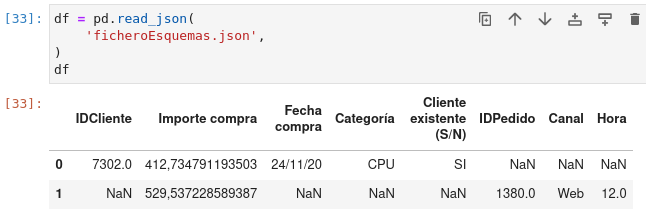